# Beispiel mit Boston Dataset

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [14]:
np.random.seed(42)

x = dataset.data[:, :] # Alle Features nutzen
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [15]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2_own: {r2_score}")

Coef: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Intercept: 31.63108403569312
R2_own: 0.7112260057484909


In [16]:
def plot_residual(regr, x_train, y_train, x_test, y_test): 
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))   
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color = "blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color = "red")
    plt.hlines(y = 0, xmin = min_val, xmax = max_val)
    plt.legend(["Train", "Test"])
    plt.show()


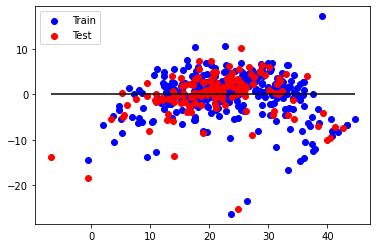

In [17]:
plot_residual(regr, x_train, y_train, x_test, y_test)